# Question 3

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(99)

rng = np.random.default_rng()

In [5]:
def generate_vehicle_position():
    """Generate a true vehicle position inside a unit circle centered at the origin."""
    angle = np.random.uniform(0, 2 * np.pi)
    radius = np.random.uniform(0, 1)
    return np.array([radius * np.cos(angle), radius * np.sin(angle)])

def generate_landmarks(K):
    """Generate K evenly spaced landmarks on the unit circle centered at the origin."""
    angles = np.linspace(0, 2 * np.pi, K, endpoint=False)
    landmarks = np.array([[np.cos(angle), np.sin(angle)] for angle in angles])
    return landmarks

def generate_range_measurements(vehicle_pos, landmarks, sigma):
    """Generate range measurements with Gaussian noise."""
    measurements = []
    for landmark in landmarks:
        while True:
            distance = np.linalg.norm(vehicle_pos - landmark)
            noise = np.random.normal(0, sigma)
            range_measurement = distance + noise
            if range_measurement >= 0:
                measurements.append(range_measurement)
                break
    return np.array(measurements)

def map_objective(x, y, landmarks, measurements, sigma, sigma_x, sigma_y):
    """Calculate the MAP objective function value for a given position [x, y]."""
    prior_term = (x**2 / (2 * sigma_x**2)) + (y**2 / (2 * sigma_y**2))
    likelihood_term = 0
    for i, landmark in enumerate(landmarks):
        distance = np.linalg.norm(np.array([x, y]) - landmark)
        likelihood_term += (measurements[i] - distance)**2 / (2 * sigma**2)
    return prior_term + likelihood_term

def plot_map_contours(vehicle_pos, landmarks, measurements, sigma, sigma_x, sigma_y, K):
    """Plot the MAP objective function contours."""
    x_vals = np.linspace(-2, 2, 100)
    y_vals = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = np.array([[map_objective(x, y, landmarks, measurements, sigma, sigma_x, sigma_y) 
                   for x in x_vals] for y in y_vals])

    plt.figure()
    contour_levels = np.linspace(np.min(Z), np.max(Z), 20)
    plt.contour(X, Y, Z, levels=contour_levels)
    plt.scatter(vehicle_pos[0], vehicle_pos[1], color='red', marker='+', label='True Vehicle Position')
    plt.scatter(landmarks[:, 0], landmarks[:, 1], color='blue', marker='o', label='Landmarks')
    plt.title(f'MAP Objective Function Contours for K={K}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

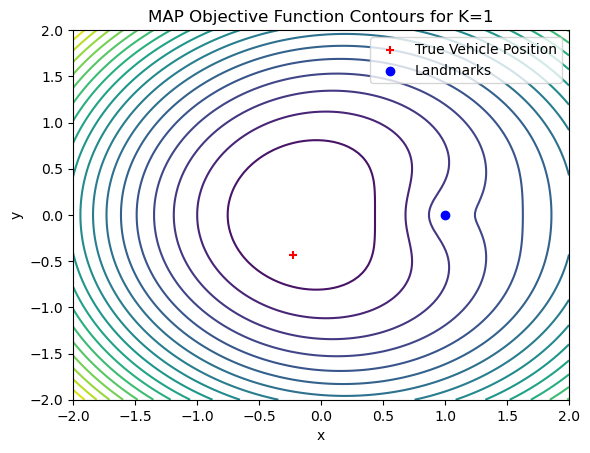

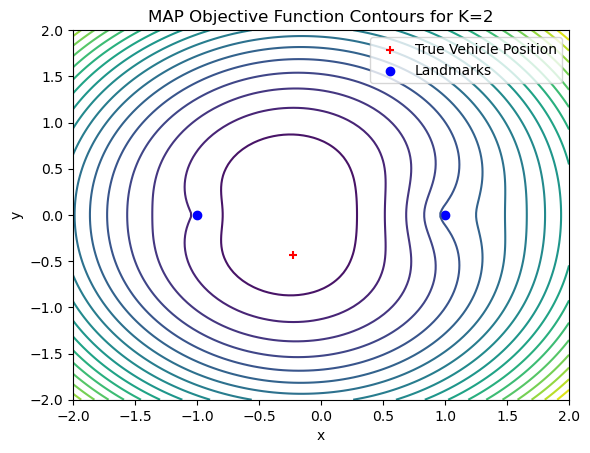

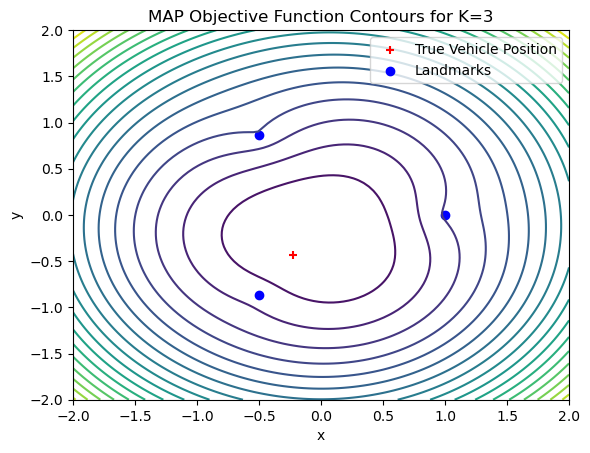

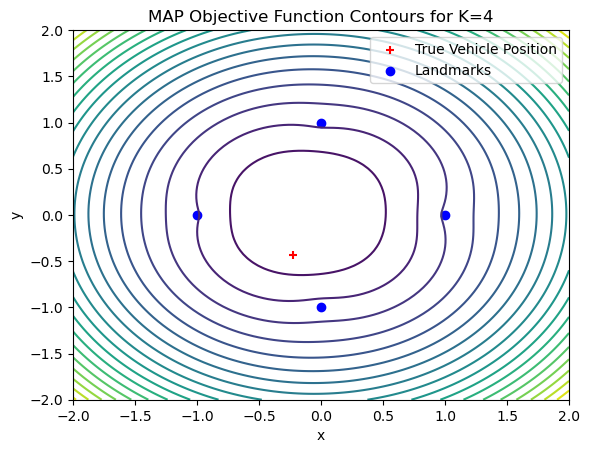

In [6]:
sigma = 0.3
sigma_x = sigma_y = 0.25
vehicle_pos = generate_vehicle_position()

for K in [1, 2, 3, 4]:
    landmarks = generate_landmarks(K)
    measurements = generate_range_measurements(vehicle_pos, landmarks, sigma)
    plot_map_contours(vehicle_pos, landmarks, measurements, sigma, sigma_x, sigma_y, K)